# Project: Performance of Multi-armed Bandit Algorithms
- Author: Jiachen Wang 2018533087
- E-mail:wangjch2@shanghaitech.edu.cn
- You can also view the project on: <https:// github.com/PeppaCat/Performance-of-Multi-armed-Bandit-Algorithms>

## 1
Question:
Suppose we obtain the Bernoulli distribution parameters from an oracle, which are shown in the
following table below. Choose $N = 10000$ and compute the theoretically maximized expectation
of aggregate rewards over N time slots. We call it the oracle value. Note that these parameters
j ; j = 1; 2; 3 and oracle values are unknown to the three bandit algorithms.

Answer:
- As $\theta$ is chosen, in order to maximize the return, we will always choose Arm 3, with final Return $R=8000$;


## 2
Question:Implement three bandit algorithms with following settings:
\begin{array}{l}{-\epsilon \text { -greedy with } \epsilon=0.1,0.5,0.9} \\ {-\mathrm{UCB} \text { with } c=1,5,10} \\ {-\text { Thompson Sampling with }} \\ {\qquad\left\{\left(\alpha_{1}, \beta_{1}\right)=(1,1),\left(\alpha_{2}, \beta_{2}\right)=(1,1),\left(\alpha_{3}, \beta_{3}\right)=(1,1)\right\} \text { and }} \\ {\quad\left\{\left(\alpha_{1}, \beta_{1}\right)=(2,4),\left(\alpha_{2}, \beta_{2}\right)=(3,6),\left(\alpha_{3}, \beta_{3}\right)=(1,2)\right\}}\end{array}

Answer: see the following 3 blocks for implementations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy import stats
import tqdm
import matplotlib.pyplot as plt
import random
from scipy import stats
class greedy():
    def __init__(self,epsilon,n):
        self.epsilon=epsilon
        self.n=n
        self.value=[0,0,0]#estimator
        self.count=[0,0,0]
        self.prob=[0.4,0.6,0.8]
        self.greedy_reward=[[0 for x in range(10000)] for y in range(3)]
        self.greedy_y=[0 for i in range(10000)]
    def exploration(self,i):
        max_index=np.random.choice([0,1,2])
        r=np.random.choice([0,1],p=(1-self.prob[max_index],self.prob[max_index]))#do experiment, return r
        self.count[max_index]+=1
        for time in range(3):
            self.greedy_reward[time][i]=-1
        self.greedy_reward[max_index][i]=r
        if(i-1>=0):
            self.greedy_y[i]=self.greedy_y[i-1]+r
        self.value[max_index]=self.value[max_index]+(1/self.count[max_index])*(r-self.value[max_index])
    def exploitation(self,i):
        max_index=self.value.index(max(self.value))
        r=np.random.choice([0,1],p=(1-self.prob[max_index],self.prob[max_index]))
        self.count[max_index]+=1
        for time in range(3):
            self.greedy_reward[time][i]=-1
        self.greedy_reward[max_index][i]=r
        if(i-1>=0):
            self.greedy_y[i]=self.greedy_y[i-1]+r
        self.value[max_index]=self.value[max_index]+(1/self.count[max_index])*(r-self.value[max_index])
    def EE_choice(self,i):
        output=np.random.choice(# o is exploitation,1 is exploration
        [0,1], 
        p=[1-self.epsilon,self.epsilon]
        )
        if output==1:
            self.exploration(i);
        else:
            self.exploitation(i);
    def exp(self):
        for i in range(0,self.n):
            self.EE_choice(i)
        return(self.value)

In [4]:
class UCB():
    def __init__(self,c,n):
        self.c=c
        self.n=n
        self.value=[0,0,0]
        self.count=[0,0,0]
        self.prob=[0.4,0.6,0.8]
        self.UCB_reward=[[0 for x in range(10000)] for y in range(3)]
        self.UCB_y=[0 for i in range(10000)]
    def initialize(self):
        for i in range(0,3):
            self.count[i]=1
            self.value[i]=np.random.choice([0,1],p=(1-self.prob[i],self.prob[i]))
            self.UCB_y[i]=self.value[i]
    def exp(self):
        self.initialize()
        for j in range(3,self.n):
            temp=[0,0,0]
            for i in range(3):
                temp[i]=self.value[i]+self.c*math.sqrt((2*math.log(j))/(self.count[i]))
            max_index=temp.index(max(temp))
            r=np.random.choice([0,1],p=(1-self.prob[max_index],self.prob[max_index]))
            self.count[max_index]+=1
            self.UCB_y[j]=r+self.UCB_y[j-1]
            self.value[max_index]=self.value[max_index]+(1/self.count[max_index])*(r-self.value[max_index])
    
            for time in range(3):
                self.UCB_reward[time][j]=-1
            self.UCB_reward[max_index][j]=r
    
        return(self.value)

In [5]:
#Thompson sample
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy import stats   
class TS():
    def __init__(self,alpha,beta,prob,n):
        self.alpha=alpha
        self.beta=beta
        self.n=n

        self.prob=prob
        self.ts_arm_1=[0 for x in range(n)]
        self.ts_arm_2=[0 for x in range(n)]
        self.ts_arm_3=[0 for x in range(n)]
        self.TS_reward=[[0 for x in range(n)] for y in range(int(len(alpha)))]
        
        self.TS_y=[0 for i in range(n)]
        self.regret=[0 for i in range(n)]
        self.sum=[0 for i in range(n)]
    def exp(self):
        for j in range(self.n):
            tmp=[0 for i in range(int(len(self.alpha)))]
            for i in range(int(len(self.alpha))):
                tmp[i]=stats.beta.rvs(self.alpha[i],self.beta[i])
                #store each time slot's action probability
            self.ts_arm_1[j]=tmp[0]
            self.ts_arm_2[j]=tmp[1]
            self.ts_arm_3[j]=tmp[2]
            
            max_index=tmp.index(max(tmp))
            r=np.random.choice([0,1],p=(1-self.prob[max_index],self.prob[max_index]))
            for time in range(int(len(self.alpha))):
                self.TS_reward[time][j]=-1
            self.TS_reward[max_index][j]=r
            if(j==0):
                self.sum[j]=r
            else:
                self.sum[j]=self.sum[j-1]+r
            self.regret[j]=(j+1)*0.6-self.sum[j]            

            
            if(j-1>=0):
                self.TS_y[j]=self.TS_y[j-1]+r
            self.alpha[max_index]+=r
            self.beta[max_index]+=(1-r)
#         print(self.value)

## 3
- For each algorithm, repeat the experiment 100 times and use the average of results of 100 exper-
iments.

### Question: Store the reward in each time slot t = 1; 2; 3; ...; 10000. For Thompson Sampling, also store the(posterior) probability of playing each arm.Plot the reward and the average reward against time slot (t = 1; 2; 3;...;N). For ThompsonSampling, plot the arm playing probabilities as well.

### Answer: for each algorithm ,after implementation, we give the average reward plot, as the points one the reward plot will crowded together which gives almost no informtaion, we leave it out

In [6]:
#do experiment on greedy
#greedy
repeat =5#change to be 100
greedy_sum = [[0 for x in range(3)] for y in range(3)]
for k in range(repeat):
    greedy_1 = greedy(0.1, 10000)
    greedy_1.exp()
    greedy_2 = greedy(0.5, 10000)
    greedy_2.exp()
    greedy_3 = greedy(0.9, 10000)
    greedy_3.exp()
    for s in range(3):
        greedy_sum[0][s]+=greedy_1.value[s]
    for s in range(3):
        greedy_sum[1][s]+=greedy_2.value[s]
    for s in range(3):
        greedy_sum[2][s]+=greedy_3.value[s]
for i in range(3):
    for j in range (3):
        greedy_sum[i][j]/=repeat
# find average reward for greedy .
average_greedy=[[0 for i in range(10000)] for j in range(3)]
def count():
    for k in range(3):
        num=1 if greedy_1.greedy_reward[k][0]!=-1 else 0
        sum=[0 for i in range(10000)]
        for i in (range(10000)):
            if(i==0):
                sum[0]=greedy_1.greedy_reward[k][0] if greedy_1.greedy_reward[k][0]!=-1 else 0
            if(greedy_1.greedy_reward[k][i]!=-1):
                sum[i]=sum[i-1]+greedy_1.greedy_reward[k][i]
                num+=1
            else:
                sum[i]=sum[i-1]
            average_greedy[k][i]=sum[i]/(num+1)
count()
average_greedy_2=[[0 for i in range(10000)] for j in range(3)]
def count2():
    for k in range(3):
        num=1 if greedy_2.greedy_reward[k][0]!=-1 else 0
        sum=[0 for i in range(10000)]
        for i in (range(10000)):
            if(i==0):
                sum[0]=greedy_2.greedy_reward[k][0] if greedy_2.greedy_reward[k][0]!=-1 else 0
            if(greedy_2.greedy_reward[k][i]!=-1):
                sum[i]=sum[i-1]+greedy_2.greedy_reward[k][i]
                num+=1
            else:
                sum[i]=sum[i-1]
            average_greedy_2[k][i]=sum[i]/(num+1)
count2()
average_greedy_3=[[0 for i in range(10000)] for j in range(3)]
def count3():
    for k in range(3):
        num=1 if greedy_3.greedy_reward[k][0]!=-1 else 0
        sum=[0 for i in range(10000)]
        for i in (range(10000)):
            if(i==0):
                sum[0]=greedy_3.greedy_reward[k][0] if greedy_3.greedy_reward[k][0]!=-1 else 0
            if(greedy_3.greedy_reward[k][i]!=-1):
                sum[i]=sum[i-1]+greedy_3.greedy_reward[k][i]
                num+=1
            else:
                sum[i]=sum[i-1]
            average_greedy_3[k][i]=sum[i]/(num+1)
count3()


In [7]:
greedy_sum

[[0.38428073654894146, 0.5845557612532482, 0.7998874905156823],
 [0.39121301369541506, 0.5999541469378415, 0.8040696828974081],
 [0.4027904676288328, 0.6074849896020839, 0.804946421237441]]

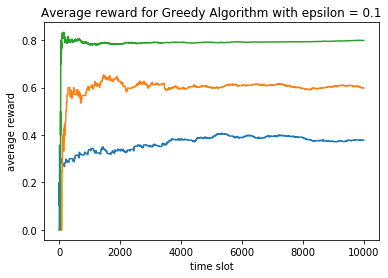

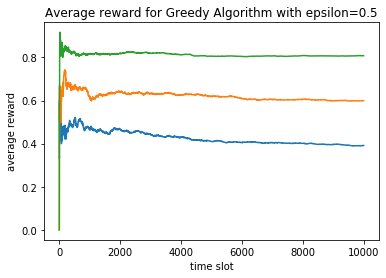

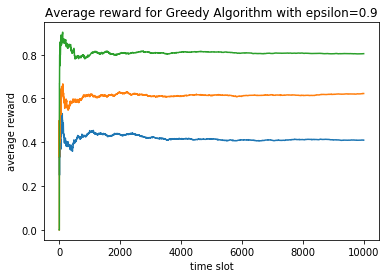

In [8]:
# from prettytable import PrettyTable
x=[i for i in range(1,10001)]
plt.plot(x,average_greedy[0],label="arm1")
plt.plot(x,average_greedy[1],label="arm2")
plt.plot(x,average_greedy[2],label="arm3")
plt.xlabel('time slot')
plt.ylabel('average reward')
plt.title('Average reward for Greedy Algorithm with epsilon = 0.1')
plt.show()
plt.plot(x,average_greedy_2[0],label="arm1")
plt.plot(x,average_greedy_2[1],label="arm2")
plt.plot(x,average_greedy_2[2],label="arm3")
plt.xlabel('time slot')
plt.ylabel('average reward')
plt.title('Average reward for Greedy Algorithm with epsilon=0.5')
plt.show()
plt.plot(x,average_greedy_3[0],label="arm1")
plt.plot(x,average_greedy_3[1],label="arm2")
plt.plot(x,average_greedy_3[2],label="arm3")
plt.xlabel('time slot')
plt.ylabel('average reward')
plt.title('Average reward for Greedy Algorithm with epsilon=0.9')
plt.show()
# x = PrettyTable()
# x.field_names = ["arm1", "arm2", "arm3"]
# x.add_row(["epsilon=0.1", greedy_sum[0][0], greedy_sum[0][1],greedy_sum[0][2]])
# x.add_row(["epsilon=0.5", greedy_sum[1][0], greedy_sum[2][1],greedy_sum[3][2]])
# x.add_row(["epsilon=0.9", greedy_sum[2][0], greedy_sum[2][1],greedy_sum[2][2]])

In [9]:
#do experiment on UCB
UCB_sum = [[0 for x in range(3)] for y in range(3)]
for k in range(repeat):
    UCB_1 = UCB(1, 10000)
    UCB_1.exp()
    UCB_2 = UCB(5, 10000)
    UCB_2.exp()
    UCB_3 = UCB(10, 10000)
    UCB_3.exp()
    for s in range(3):
        UCB_sum[0][s]+=UCB_1.value[s]
    for s in range(3):
        UCB_sum[1][s]+=UCB_2.value[s]
    for s in range(3):
        UCB_sum[2][s]+=UCB_3.value[s]
for i in range(3):
    for j in range (3):
        UCB_sum[i][j]/=repeat
average_UCB=[[0 for i in range(10000)] for j in range(3)]
def count():
    for k in range(3):
        num2=1 if UCB_1.UCB_reward[k][0]!=-1 else 0
        sum=[0 for i in range(10000)]
        for i in (range(10000)):
            if(i==0):
                sum[0]=UCB_1.UCB_reward[k][0] if UCB_1.UCB_reward[k][0]!=-1 else 0
            if(UCB_1.UCB_reward[k][i]!=-1):
                sum[i]=sum[i-1]+UCB_1.UCB_reward[k][i]
                num2+=1
            else:
                sum[i]=sum[i-1]
            average_UCB[k][i]=sum[i]/(num2+1)
count()
average_UCB_2=[[0 for i in range(10000)] for j in range(3)]
def count1():
    for k in range(3):
        num2=1 if UCB_2.UCB_reward[k][0]!=-1 else 0
        sum=[0 for i in range(10000)]
        for i in (range(10000)):
            if(i==0):
                sum[0]=UCB_2.UCB_reward[k][0] if UCB_2.UCB_reward[k][0]!=-1 else 0
            if(UCB_2.UCB_reward[k][i]!=-1):
                sum[i]=sum[i-1]+UCB_2.UCB_reward[k][i]
                num2+=1
            else:
                sum[i]=sum[i-1]
            average_UCB_2[k][i]=sum[i]/(num2+1)
count1()
average_UCB_3=[[0 for i in range(10000)] for j in range(3)]
def count2():
    for k in range(3):
        num2=1 if UCB_3.UCB_reward[k][0]!=-1 else 0
        sum=[0 for i in range(10000)]
        for i in (range(10000)):
            if(i==0):
                sum[0]=UCB_3.UCB_reward[k][0] if UCB_3.UCB_reward[k][0]!=-1 else 0
            if(UCB_3.UCB_reward[k][i]!=-1):
                sum[i]=sum[i-1]+UCB_3.UCB_reward[k][i]
                num2+=1
            else:
                sum[i]=sum[i-1]
            average_UCB_3[k][i]=sum[i]/(num2+1)
count2()

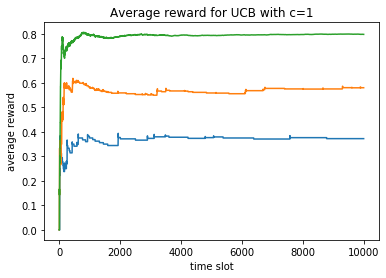

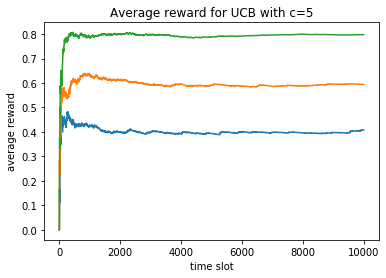

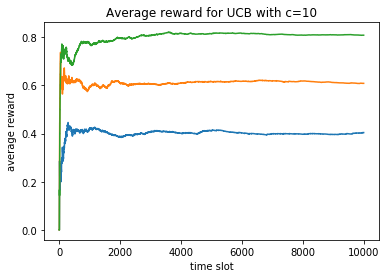

In [11]:
x=[i for i in range(1,10001)]
plt.plot(x,average_UCB[0],label="arm1")
plt.plot(x,average_UCB[1],label="arm2")
plt.plot(x,average_UCB[2],label="arm3")
plt.xlabel('time slot')
plt.ylabel('average reward')
plt.title('Average reward for UCB with c=1')
plt.show()
plt.plot(x,average_UCB_2[0],label="arm1")
plt.plot(x,average_UCB_2[1],label="arm2")
plt.plot(x,average_UCB_2[2],label="arm3")
plt.xlabel('time slot')
plt.ylabel('average reward')
plt.title('Average reward for UCB with c=5')
plt.show()
plt.plot(x,average_UCB_3[0],label="arm1")
plt.plot(x,average_UCB_3[1],label="arm2")
plt.plot(x,average_UCB_3[2],label="arm3")
plt.xlabel('time slot')
plt.ylabel('average reward')
plt.title('Average reward for UCB with c=10')
plt.show()
# x = PrettyTable()
# x.field_names = ["arm1", "arm2", "arm3"]
# x.add_row(["c=1", UCB_sum[0][0], UCB_sum[0][1],UCB_sum[0][2]])
# x.add_row(["c=5", UCB_sum[1][0], UCB_sum[2][1],UCB_sum[3][2]])
# x.add_row(["c=9", UCB_sum[2][0], UCB_sum[2][1],UCB_sum[2][2]])

In [13]:
#do experiment with thompson sampling
TS_sum = [[0 for x in range(3)] for y in range(4)]
#arm playing probabilities against time slot
arm_1_y=[0 for i in range(10000)]
arm_2_y=[0 for i in range(10000)]
arm_3_y=[0 for i in range(10000)]
average_TS_2=[[0 for i in range(10000)] for j in range(3)]
def count1():
    for k in range(3):
        num=1 if TS_2.TS_reward[k][0]!=-1 else 0
        sum=[0 for i in range(10000)]
        for i in (range(10000)):
            if(i==0):
                sum[0]=TS_2.TS_reward[k][0] if TS_2.TS_reward[k][0]!=-1 else 0
            if(TS_2.TS_reward[k][i]!=-1):
                sum[i]=sum[i-1]+TS_2.TS_reward[k][i]
                num+=1
            else:
                sum[i]=sum[i-1]
            average_TS_2[k][i]=sum[i]/(num+1)
average_TS=[[0 for i in range(10000)] for j in range(3)]
def count():
    for k in range(3):
        num=1 if TS_1.TS_reward[k][0]!=-1 else 0
        sum=[0 for i in range(10000)]
        for i in (range(10000)):
            if(i==0):
                sum[0]=TS_1.TS_reward[k][0] if TS_1.TS_reward[k][0]!=-1 else 0
            if(TS_1.TS_reward[k][i]!=-1):
                sum[i]=sum[i-1]+TS_1.TS_reward[k][i]
                num+=1
            else:
                sum[i]=sum[i-1]
            average_TS[k][i]+=(sum[i]/(num+1))
for k in range(repeat):
    TS_1 = TS([1,1,1],[1,1,1],[0.4,0.6,0.8],10000)
    TS_1.exp()
    TS_2 = TS([2,3,1],[4,6,2],[0.4,0.6,0.8],10000)
    TS_2.exp()
    #store parameter
    for s in range(3):
        TS_sum[0][s]+=TS_1.alpha[s]
    for s in range(3):
        TS_sum[1][s]+=TS_1.beta[s]
    for s in range(3):
        TS_sum[2][s]+=TS_2.alpha[s]
    for s in range(3):
        TS_sum[3][s]+=TS_2.beta[s]
    #store y axis now just for 1 exp
    for i in range(10000):
        arm_1_y[i]+=TS_1.ts_arm_1[i]
        arm_2_y[i]+=TS_1.ts_arm_2[i]
        arm_3_y[i]+=TS_1.ts_arm_3[i]
    count()       
    count1()    
        
for i in range(10000):
    arm_1_y[i]/=repeat
    arm_2_y[i]/=repeat
    arm_3_y[i]/=repeat
for i in range(4):
    for j in range (3):
        TS_sum[i][j]/=repeat
for i in range(3):
    for j in range(10000):
        average_TS[i][j]/=repeat
        average_TS_2[i][j]/=repeat
    

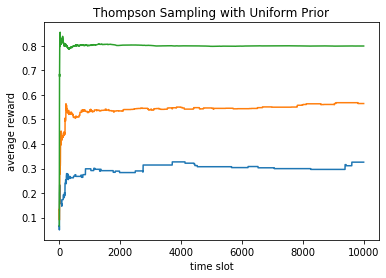

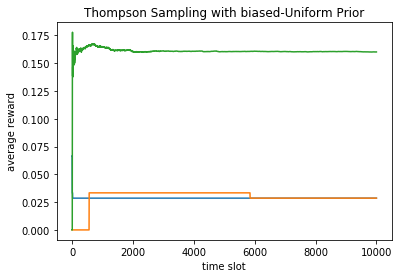

In [14]:
x=[i for i in range(1,10001)]
plt.plot(x,average_TS[0],label="arm1")
plt.plot(x,average_TS[1],label="arm2")
plt.plot(x,average_TS[2],label="arm3")

plt.xlabel('time slot')
plt.ylabel('average reward')
plt.title('Thompson Sampling with Uniform Prior')
plt.show()
plt.plot(x,average_TS_2[0],label="arm1")
plt.plot(x,average_TS_2[1],label="arm2")
plt.plot(x,average_TS_2[2],label="arm3")

plt.xlabel('time slot')
plt.ylabel('average reward')
plt.title('Thompson Sampling with biased-Uniform Prior')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

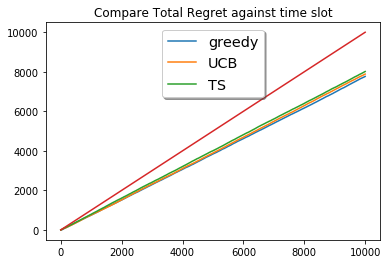

In [15]:
timeslot=[i for i in range(1,10001)]
sum=0
for i in greedy_1.greedy_reward:
    if i==1:
        sum+=1

ideal=[i for i in range(1,10001)]    
plt.plot(timeslot,greedy_1.greedy_y,label="greedy")
plt.plot(timeslot,UCB_1.UCB_y,label="UCB")
plt.plot(timeslot,TS_1.TS_y,label="TS")
plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.plot(timeslot,ideal)
plt.title('Compare Total Regret against time slot')
plt.show

## Comparison between parameters of three algorithm
- epsilon-greedy means pick the current best option ("greedy") most of the time, but pick a random option with a small (epsilon) probability sometimes.Thus, epsilon means a balance between exploration and exploitation. The higher epsilon is, the more it is likely to explore.
- The Upper Confidence Bounds (UCB) algorithm measures this potential by an upper confidence bound of the reward value, ˆUt(a), so that the true value is below with bound Q(a)≤ˆQt(a)+ˆUt(a) with high probability.
- In Thompson Sampling, $\alpha$ and $\beta$ means the prior distribution of each arm, the closer it is with the real distribution ,he lower the regret will be: In brief, it is our belief in prior.

## Deal with dependent case:
### introduction:
Dependent arm case are widely considered,such as ads on similar topics, using similar text/phrases, should have similar rewards.
Dependency among arms can be measured in many ways. It can be interpreted a pulling one arm gives side information of other arms or there is a prior knowledge of the distribution of the arms.
In this paper: Multi-armed Bandit Problems with Dependent Arms,authors proposed a optimal strategy for the latter problem, they divide the stategy into 2 steps:
• Policy step: A bandit policy is applied tochoose the next arm to pull.
• Update step: The result of the arm pull (i.e.,reward) is used to update the parameters ofthe policy.
But What is the reward probability r of a “cluster arm”?
We can measure it in 3 ways: by mean,max or average.

$MEAN: r = ∑si / ∑ni$

$MAX:    r = max( E[μi] )$

$PMAX:  r = E[ max(μi) ]$

Also, the charateristics of the cluster will also effect the performance.We first define the Crossover-time: Time when the expected reward probability of the optimal cluster becomes highest among all “cluster arms”
The effect can be interpreted as follows:
Cluster separation$ Δ = μopt – μmax$ outside opt cluster
  Δ increases while Tc decreases
Cluster size $A_{opt}$
   Aopt increases while Tc increases
Cohesiveness in opt cluster $1-avg(μopt – μi)$
   Cohesiveness increases while Tc decreases
   
   In another paper:Online Interactive Collaborative Filtering Using Multi-Armed
   In the next we will reproduce the algorithm some scholars proposed  and test them in real world dataset.

In [18]:
#TS with clustering
#Thompson sample
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy import stats   
from tqdm import trange
class cluster():
    def __init__(self,alpha,beta,prob,n,m):
        self.alpha=alpha
        self.beta=beta
        self.n=n
        self.prob=prob
        self.cluster_alpha=[0 for i in range(m)]# 2cluster
        self.cluster_beta=[0 for i in range(m)]
        self.m=m
        
        self.sum=[0 for i in range(n)]
        self.regret=[0 for i in range(n)]
        
    def exp(self):
        for j in range(self.n):
            
            tmp=[0 for i in range(len(self.prob))]
            for i in range(len(self.prob)):
                tmp[i]=stats.beta.rvs(self.alpha[i],self.beta[i])
            for t in range(self.m):   
                for i in range(int(len(self.alpha)/2)):
                    self.cluster_alpha[t]+=self.alpha[i]
                    self.cluster_beta[t]+=self.beta[i]

            ctmp=[0 for i in range(self.m)]
            for i in range(self.m):
                ctmp[i]=stats.beta.rvs(self.cluster_alpha[i],self.cluster_beta[i])
            max_cindex=ctmp.index(max(ctmp))
            former=[]
            latter=[]
            for i in range(int(self.m/2)):
                former.append(tmp[i])
            for i in range(int(self.m/2)):
                latter.append(tmp[int(self.m/2)+i])
            
            if max_cindex==0:
                max_index=former.index(max(former))
            else:
                max_index=latter.index(max(latter))
                
            max_index=tmp.index(max(tmp))
            r=np.random.choice([0,1],p=(1-self.prob[max_index],self.prob[max_index]))
            
            if(j==0):
                self.sum[j]=r
            else:
                self.sum[j]=self.sum[j-1]+r
            self.regret[j]=(j+1)*0.6-self.sum[j]

            self.alpha[max_index]+=r
            self.beta[max_index]+=(1-r)
# cluster_1=cluster([1,1,1,1,1,1],[1,1,1,1,1,1],[0.2,0.3,0.25,0.5,0.6,0.55],10000,2)
# cluster_1.exp()
# TS_3=TS([1,1,1,1,1,1],[1,1,1,1,1,1],[0.2,0.3,0.25,0.5,0.6,0.55],10000)
# TS_3.exp()

average_cluster_regret=[0 for i in range(10000)]
average_TS_regret=[0 for i in range(10000)]
for time in trange(100):
    cluster_1=cluster([1,1,1,1,1,1],[1,1,1,1,1,1],[0.2,0.3,0.25,0.5,0.6,0.55],10000,2)
    cluster_1.exp()    
    TS_3=TS([1,1,1,1,1,1],[1,1,1,1,1,1],[0.2,0.3,0.25,0.5,0.6,0.55],10000)
    TS_3.exp()
    for e in range(10000):
        average_cluster_regret[e]+=cluster_1.regret[e]
        average_TS_regret[e]+=TS_3.regret[e]
for i in range(10000):
    average_cluster_regret[i]/=100
    average_TS_regret[i]/=100



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [09:28<00:00,  5.61s/it]


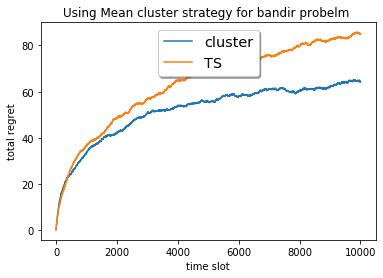

In [20]:
x=[i for i in range(10000)]
plt.plot(x,average_cluster_regret,label='cluster')
plt.plot(x,average_TS_regret,label='TS')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.xlabel('time slot')
plt.ylabel('total regret')
plt.title('Using Mean cluster strategy for bandir probelm ')
plt.show()

#### As we can see, after using cluster strategy, the regret for the game process is largely decreased! After that ,we implement the algorithm on real world dataset: Movielens10M, which is also tested by authors in paper:Online Interactive Collaborative Filtering Using Multi-Armed Bandit with Dependent Arms. Due to the limit, we put the algorithm imploementation and analysis on github:<https:// github.com/PeppaCat/Performance-of-Multi-armed-Bandit-Algorithms>, Feel free to play with that code.

- Reference:
Online Interactive Collaborative Filtering Using Multi-Armed Bandit with Dependent Arms
Multi-armed Bandit Problems with Dependent Arms
Online Interactive Collaborative Filtering Using Multi-Armed Bandit with Dependent Arms
Multi-dueling Bandits with Dependent Arms